## Inspired by this tuturial link: http://imageprocessingplace.org/downloads_V3/root_downloads/tutorials/contour_tracing_Abeer_George_Ghuneim/moore.html

In [121]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read input image 

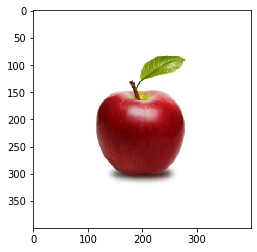

In [122]:
image = cv2.imread('image.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Convert from RGB 2 BW

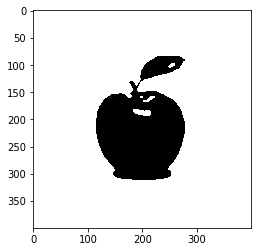

In [123]:
img = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 180, 255, cv2.THRESH_BINARY_INV)
img = cv2.medianBlur((255-img[1]), 5)
plt.imshow(img,cmap='gray', vmin=0, vmax=255)

# First step: Set B to be empty.

In [124]:
B = list()

# Second step: find start point
## From bottom to top and left to right scan the cells of T until a black pixel, s, of P is found.


In [125]:
b = [0,0]
def get_start(img):    
    global b 
    [r,c] = img.shape    
    for j in range(0,c):            
        for i in range(r-1,-1,-1):        
            if(img[i,j] == 0):
                return [i,j]
            b = [i,j]
s =  get_start(img)
print(f'start point is : {s}')
print(f'backtrak point is : {b}')

start point is : [226, 116]
backtrak point is : [227, 116]


## Insert s in B

In [126]:
B.append(s)

## Set the current boundary point p to s i.e. p=s

In [127]:
p = s.copy()

In [128]:
def get_index(p,b):
    if(b[1] - p[1] == -1):
        if(b[0] - p[0] == -1): 
            return 1        
        
        if(b[0] - p[0] == 0): # go from p8 to p1
            return 8
        
        if(b[0] - p[0] == 1): # go from p7 to p8
            return 7
        
    if(b[1] - p[1] == 0):
        if(b[0] - p[0] == -1): # go from p2 to p3
            return 2
        
        if(b[0] - p[0] == 1): # go from p6 to p7
            return 6
                
    if(b[1] - p[1] == 1):
        if(b[0] - p[0] == -1): # B in p3 and go to p4
            return 3
        
        if(b[0] - p[0] == 0): # go from p4 to p5
            return 4
        
        if(b[0] - p[0] == 1): # go from p5 to p6
            return 5

In [129]:
def apply_neighbor(p,index):
    if(index > 8):
        index -= 8
    if(index == 1):
        return [p[0]-1,p[1]-1]
    if(index == 2):
        return [p[0]-1,p[1]]
    if(index == 3):
        return [p[0]-1,p[1]+1]
    if(index == 4):
        return [p[0],p[1]+1]
    if(index == 5):
        return [p[0]+1,p[1]+1]
    if(index == 6):
        return [p[0]+1,p[1]]
    if(index == 7):
        return [p[0]+1,p[1]-1]
    if(index == 8):
        return [p[0],p[1]-1]

In [130]:
def isValid(p,img):    
    if(p[0] < 0 or p[1] < 0 or p[0] >=img.shape[0] or p[1] >= img.shape[1]):        
        return False
    return True

In [131]:
def get_next(p,b):
    index = get_index(p,b)
    for i in range(1,9):    
        if(isValid(apply_neighbor(p.copy(),index + i ), img)):
            c = apply_neighbor(p.copy(),index + i)
            break
    return c

c = get_next(p,b)
c

[227, 115]

In [132]:
while(c != s):  
    if(c in B):
        break
    if(img[c[0],c[1]] == 0):        
        B.append(c)
        b = p.copy()        
        p = c.copy()        
        c = get_next(p,b)         
    else:
        b = c.copy()
        c = get_next(p,b)          

In [133]:
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        img[i,j] = 0 
        
for b in B:
    img[b[0],b[1]] = 255

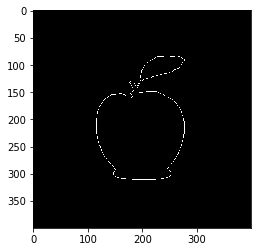

In [134]:
plt.imshow(img,cmap='gray', vmin=0, vmax=255)